In [114]:
import networkx as nx
import networkx.readwrite.gml as graph_reader
import numpy as np
import matplotlib.pyplot as plt
import copy

In [104]:
def switch_edge(graph,edge1, edge2):

    if graph.has_edge(edge1[0],edge2[0]) or graph.has_edge(edge1[1],edge2[1]) or edge1==edge2:
        return

    graph.add_edge(edge1[0],edge2[0])
    graph.add_edge(edge1[1],edge2[1])

    graph.remove_edge(*edge1)
    graph.remove_edge(*edge2)



def randomize_graph(graph, n):
    for i in range(n):
        edges = list(graph.edges())
        edge1_index, edge2_index = np.random.randint(0,len(edges),2)
        switch_edge(graph,edges[edge1_index],edges[edge2_index])
        

In [121]:
graph_og = graph_reader.read_gml("data/graph_game_thrones.gml")
graph_random = copy.deepcopy(graph_og)
randomize_graph(graph_random, len(graph_random.edges()))
print(f"Knn: {nx.algorithms.assortativity.average_degree_connectivity(graph_og)}")
print(f"Pearson Correlation coefficient Original: {nx.algorithms.assortativity.degree_pearson_correlation_coefficient(graph_og)}")
print(f"Pearson Correlation coefficient Random: {nx.algorithms.assortativity.degree_pearson_correlation_coefficient(graph_og)}")

Knn: {5: 13.672727272727272, 4: 13.525, 15: 7.533333333333333, 2: 14.875, 3: 15.25, 6: 14.018518518518519, 12: 13.25, 24: 12.791666666666666, 18: 14.0, 36: 9.916666666666666, 22: 11.409090909090908, 7: 16.714285714285715, 8: 13.75, 9: 14.88888888888889, 1: 14.25, 14: 10.928571428571429, 13: 14.538461538461538, 20: 13.65, 19: 14.68421052631579, 26: 10.5, 10: 14.0, 25: 12.04}
Pearson Correlation coefficient Original: -0.13076968366930314
Pearson Correlation coefficient Random: -0.13076968366930314


Text(0, 0.5, 'average degree')

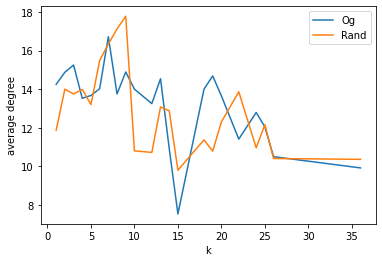

In [136]:
knn_og = nx.algorithms.assortativity.average_degree_connectivity(graph_og)
knn_rand = nx.algorithms.assortativity.average_degree_connectivity(graph_random)
keys_og = list(knn_og)
keys_rand = list(knn_rand)
keys_og.sort()
keys_rand.sort()

values_og = [knn_og[key] for key in keys_og]
values_rand = [knn_rand[key] for key in keys_rand]

plt.plot(keys_og,values_og,label="Og")
plt.plot(keys_rand,values_rand,label="Rand")
plt.legend()
plt.xlabel("k")
plt.ylabel("average degree")
#plt.plot(knn_rand)